<a href="https://colab.research.google.com/github/tarachandaniheena/LogisticRegression/blob/main/Hotel_Booking_Prediction_using_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

## Loading data

In [ ]:
data = pd.read_csv('INNHotelsGroup.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# checking first 5 rows of data
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# checking last 5 rows of data
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


- The dataset contains information about different bookings.

In [ ]:
df.shape

(36275, 19)

- We have 36275 rows and 19 columns in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- we have 5 columns of object datatype and rest are numeric
- There are no null values

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


- On average the lead time of booking is 85 days and media time is 57, that means the data is right skewed.
- Avg price per room is $103.
- Min number of adults is 0, we need to investigate this further.
- Dataset is composed of 2017 and 2018's bookings data.

In [ ]:
df.duplicated().sum()

0

- Dataset does not have duplicate values.

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- Dataset does not have any missing values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
def stacked_barplot(data, feature, target):
    count = data[feature].nunique()
    sorter = data[target].value_counts().index[-1]
    tabl = pd.crosstab(data[feature], data[target], margins = True).sort_values(by = sorter, ascending = False)

    print(tabl)
    print('-'*120)

    tab = pd.crosstab(data[feature], data[target], normalize="index").sort_values(by = sorter, ascending = False)
    print(tab)

    tab.plot(kind="bar",stacked=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))

    plt.show()


In [ ]:
def labeled_barplot(data, feature, perc = False, n=None):
    total = len(data[feature])  # total length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 2, 6))
    else:
        plt.figure(figsize = (n+2, 6))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
         data = data,
         x = feature,
         palette = 'Paired',
         order = data[feature].value_counts().index[:n],)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height()/total) #percentage of each class of the category
        else:
            label = p.get_height() # count of each level of the category

        x = p.get_x() + p.get_width()/2
        y = p.get_height()

        ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 5),
                textcoords="offset points",
            )  #annotate the percentage


    plt.show()


In [ ]:
def distribution_plot_wrt_target(data, feature, target):
    fig, axs = plt.subplots(2, 2, figsize = (12, 10))

    target_uniq = data[target].unique()

    axs[0,0].set_title("Distribution of target for target="+str(target_uniq[0]))
    sns.histplot(
        data = data[data[target] == target_uniq[0]],
        x=feature,
        kde = True,
        ax = axs[0,0]
    )

    axs[0,1].set_title("Distribution of target for target="+str(target_uniq[1]))
    sns.histplot(
    data = data[data[target] == target_uniq[1]],
    x=feature,
    kde = True,
    ax = axs[0,1]
    )


    axs[1,0].set_title("Boxplot for target")
    sns.boxplot(
    data = data,
    x=target,
    y=feature,
    ax=axs[1,0])

    axs[1,1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
    data = data,
    x=target,
    y=feature,
    showfliers = False,
    ax=axs[1,1])

    plt.tight_layout()
    plt.show()


#### **Observations on number of adults & number of children**

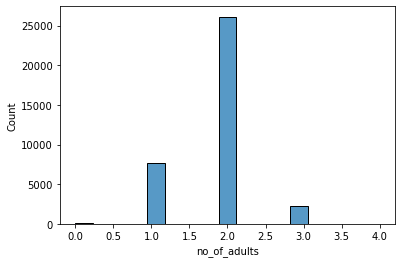

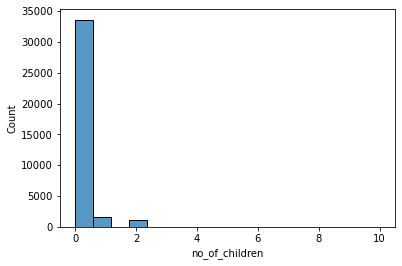

In [ ]:
sns.histplot(data = df, x = 'no_of_adults')
plt.show()
sns.histplot(data = df, x = 'no_of_children')
plt.show()

- Usually the number of adults is 2 with no children

#### **Observations on lead time**

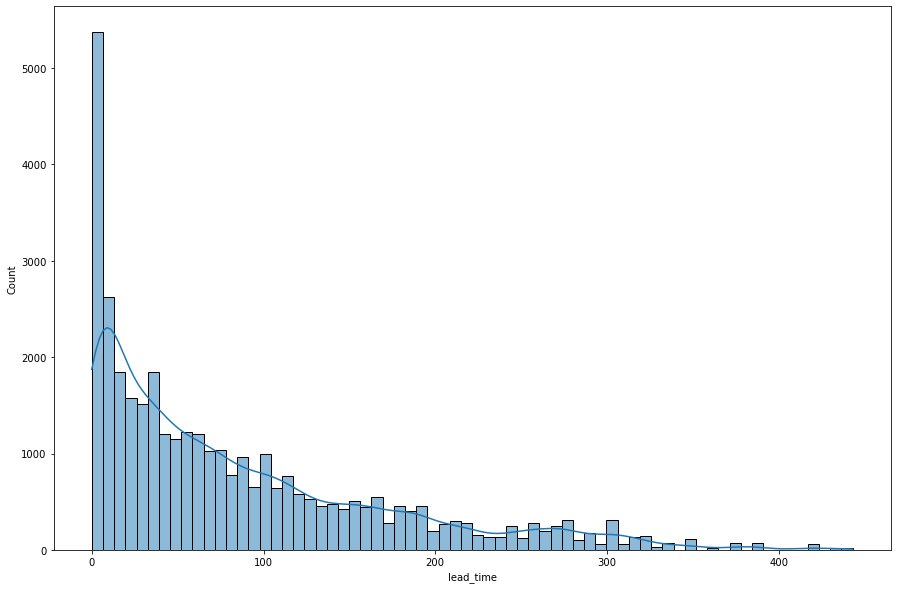

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(data = df, x = 'lead_time', kde=True);

- Seems like majority of the bookings were not planned in advance, whereas some to the bookings were planned almost a year back
- Lead time is heavily right skewed

#### **Observations on average price per room**

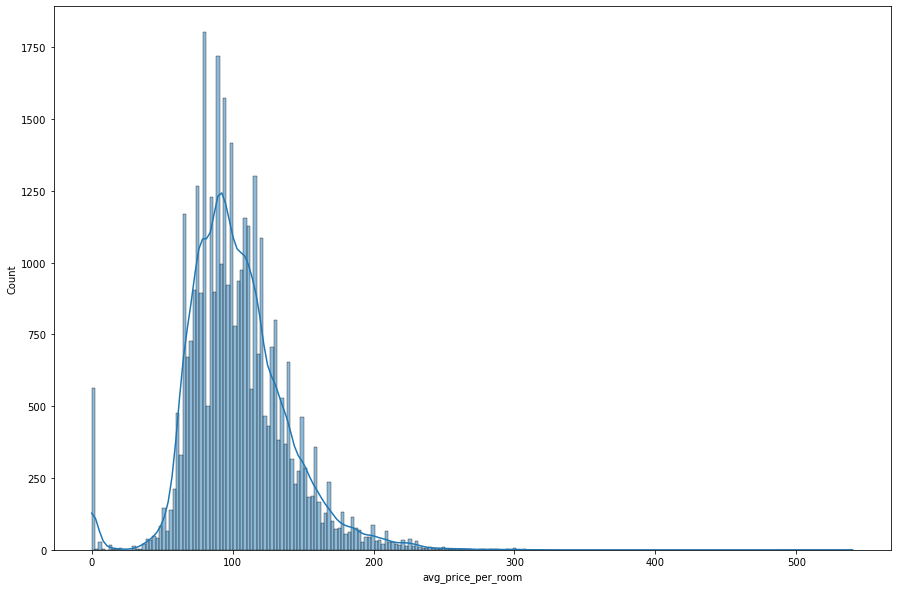

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(data = df, x = 'avg_price_per_room', kde=True);

- Avg price per room is almost a normal distribution with 100 being the mean price.
- Some of the bookings have an avg price of 0, we need to investigate this further.

#### **Observations on busiest months**

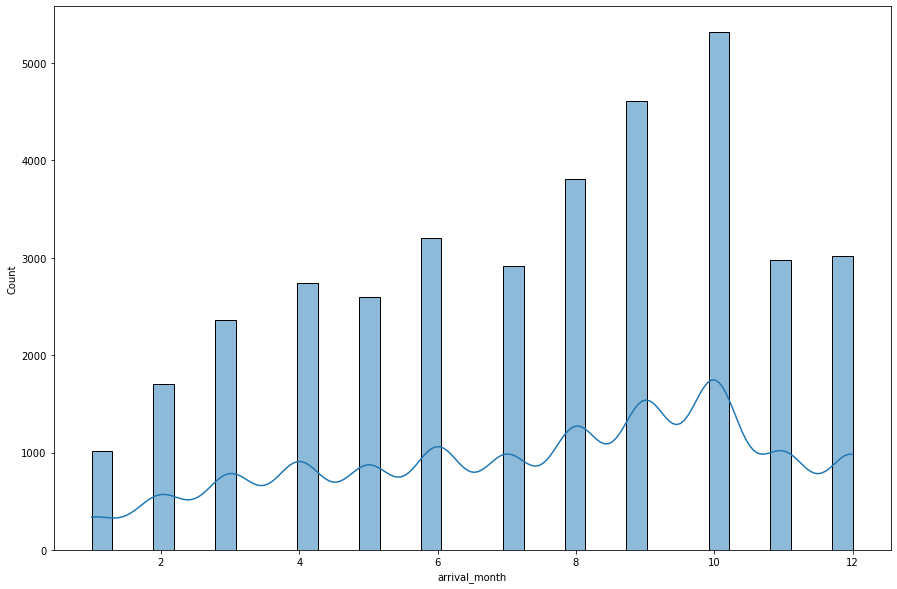

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(data = df, x = 'arrival_month', kde=True);

- Start of fall i.e september and october are the busiest months compared to other time of the year.

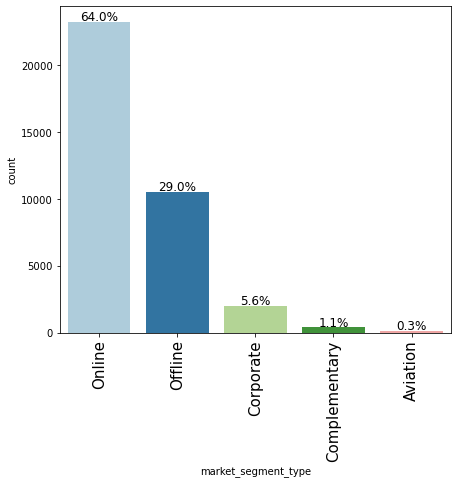

In [ ]:
labeled_barplot(df, "market_segment_type", perc = True )

- 64% of the bookings occured through online segment, followed by offline

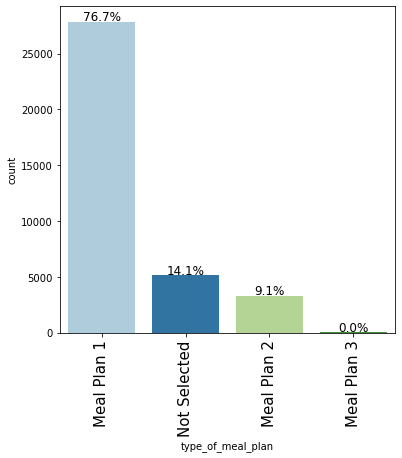

In [ ]:
labeled_barplot(df, "type_of_meal_plan", perc = True )

- 77% if th bookings selected Meal Plan 1 and 14% selected nothing

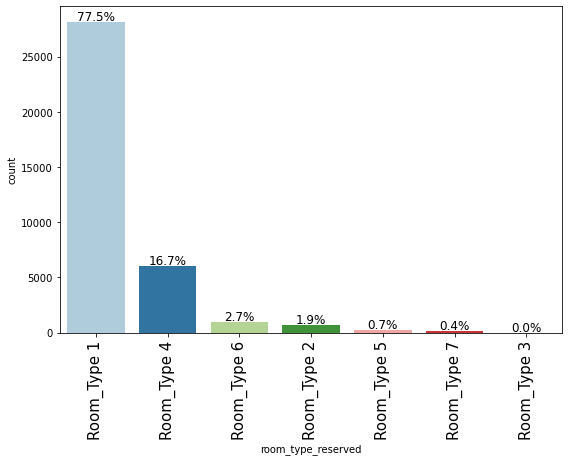

In [ ]:
labeled_barplot(df, "room_type_reserved", perc = True )

- 77% of the bookings selected room type 1

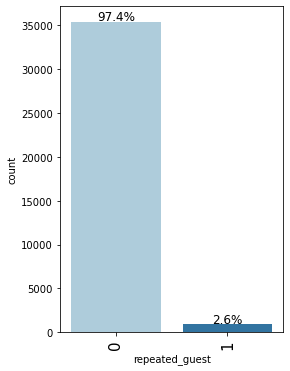

In [ ]:
labeled_barplot(df, "repeated_guest", perc = True )

Only 2.5% of the customers are repeat customers.

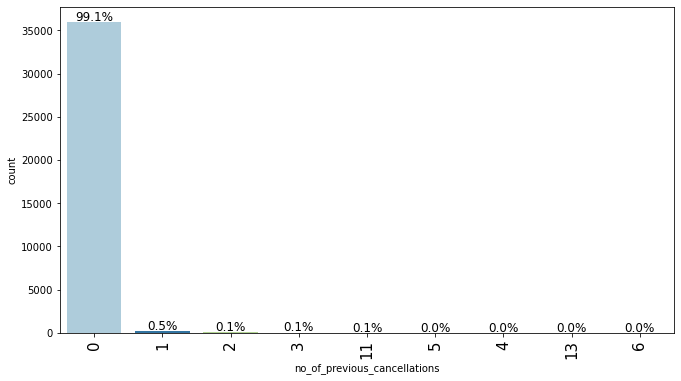

In [ ]:
labeled_barplot(df, "no_of_previous_cancellations", perc = True )

Given that most of the customers are new customers, we dont see much of the previous cancellations.

### Bivariate analysis

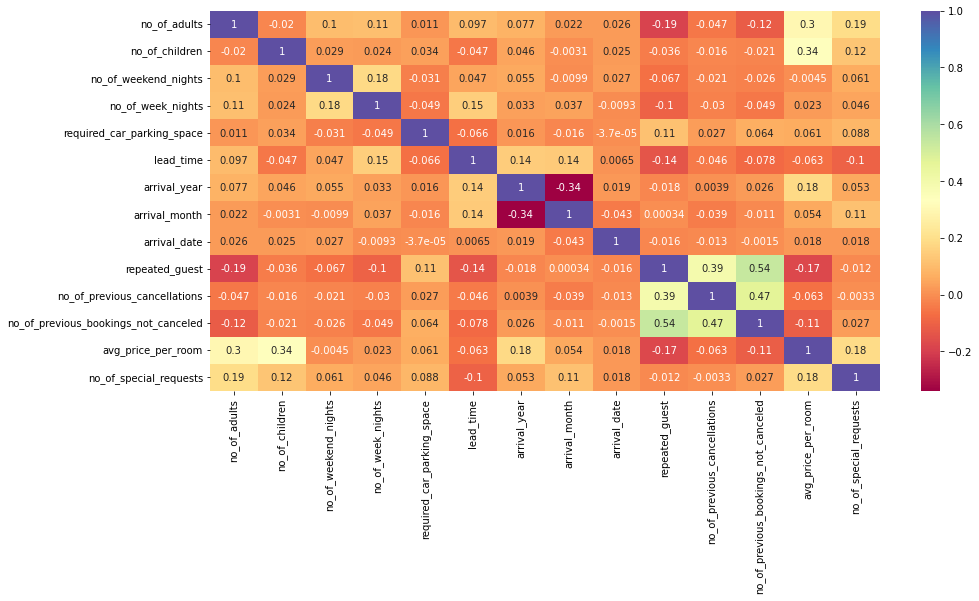

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot=True, cmap="Spectral")
plt.show()

- There is no significat correlations in the columns.

#### avg_price_per_room vs booking_status

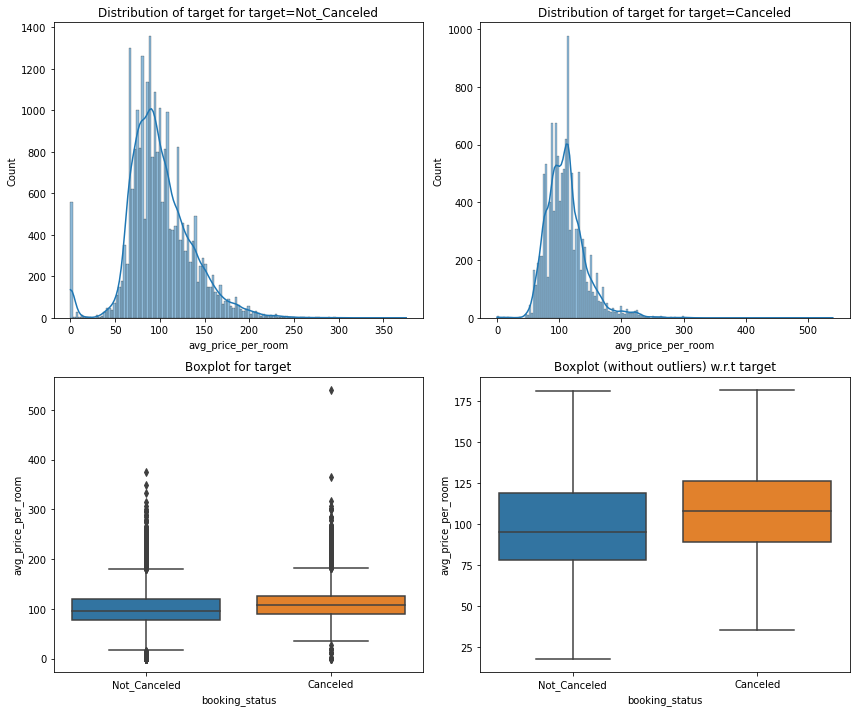

In [ ]:
distribution_plot_wrt_target(df, 'avg_price_per_room', 'booking_status')

In [ ]:
#### lead_time vs booking_status

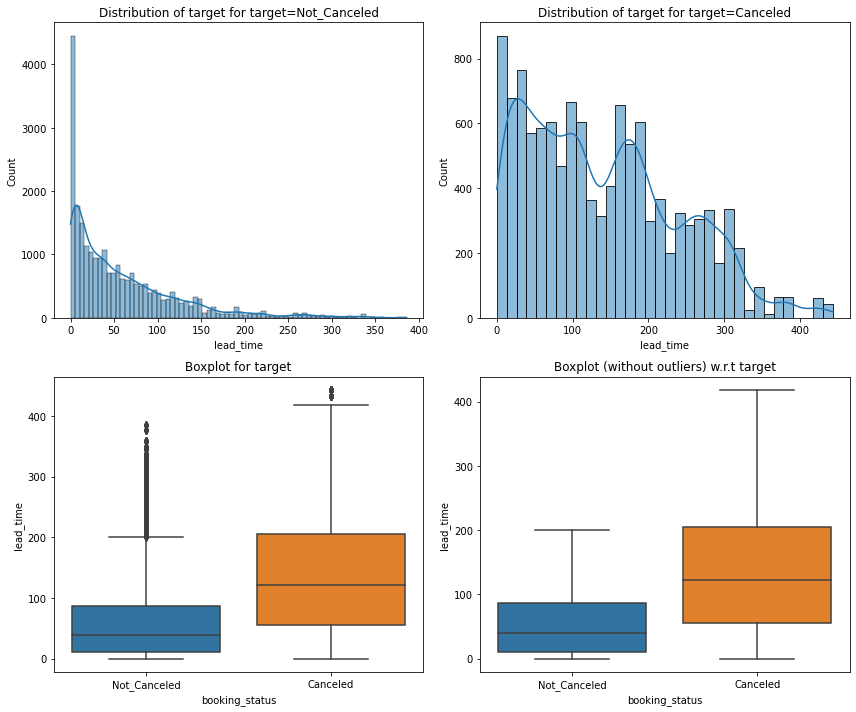

In [ ]:
distribution_plot_wrt_target(df, 'lead_time', 'booking_status')

#### avg_price_per_room vs market_segment_type

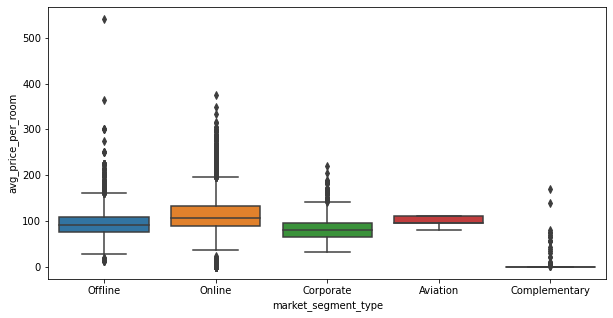

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x="market_segment_type", y='avg_price_per_room');

Bssed on boxplot above,rooms priced lower than $100 tend to have lower cancellations.

- Majority of the bookings are online, and online's median avg price is higher than other segment types.

#### booking_status vs market_segment_type

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------
booking_status       Canceled  Not_Canceled
market_segment_type                        
Online               0.365081      0.634919
Offline              0.299487      0.700513
Aviation             0.296000      0.704000
Corporate            0.109073      0.890927
Complementary        0.000000      1.000000


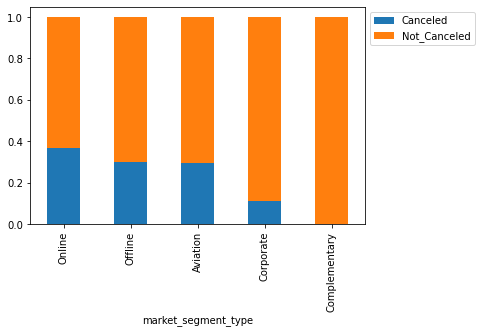

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

- Online segment have 37% of the cancellations out of the total bookings

#### booking_status vs repeated_guest

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------
booking_status  Canceled  Not_Canceled
repeated_guest                        
0               0.335804      0.664196
1               0.017204      0.982796


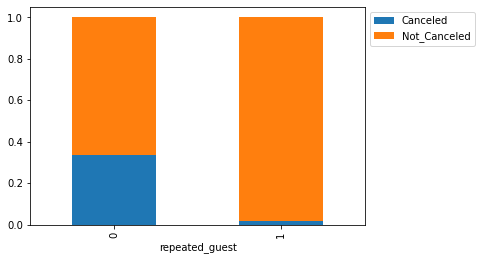

In [ ]:
stacked_barplot(df, "repeated_guest", "booking_status")

- Repeat customers have a cancellation rate of 1%, which shows repeat customers are loyal.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Dataset does not contain any missing values.

### Feature Engineering

In [ ]:
# we will drop arrival year as this will not be relevant for classification
df_copy = df.drop(['arrival_year', 'Booking_ID'], axis = 1)
df_copy.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,Canceled


### Outlier Detection

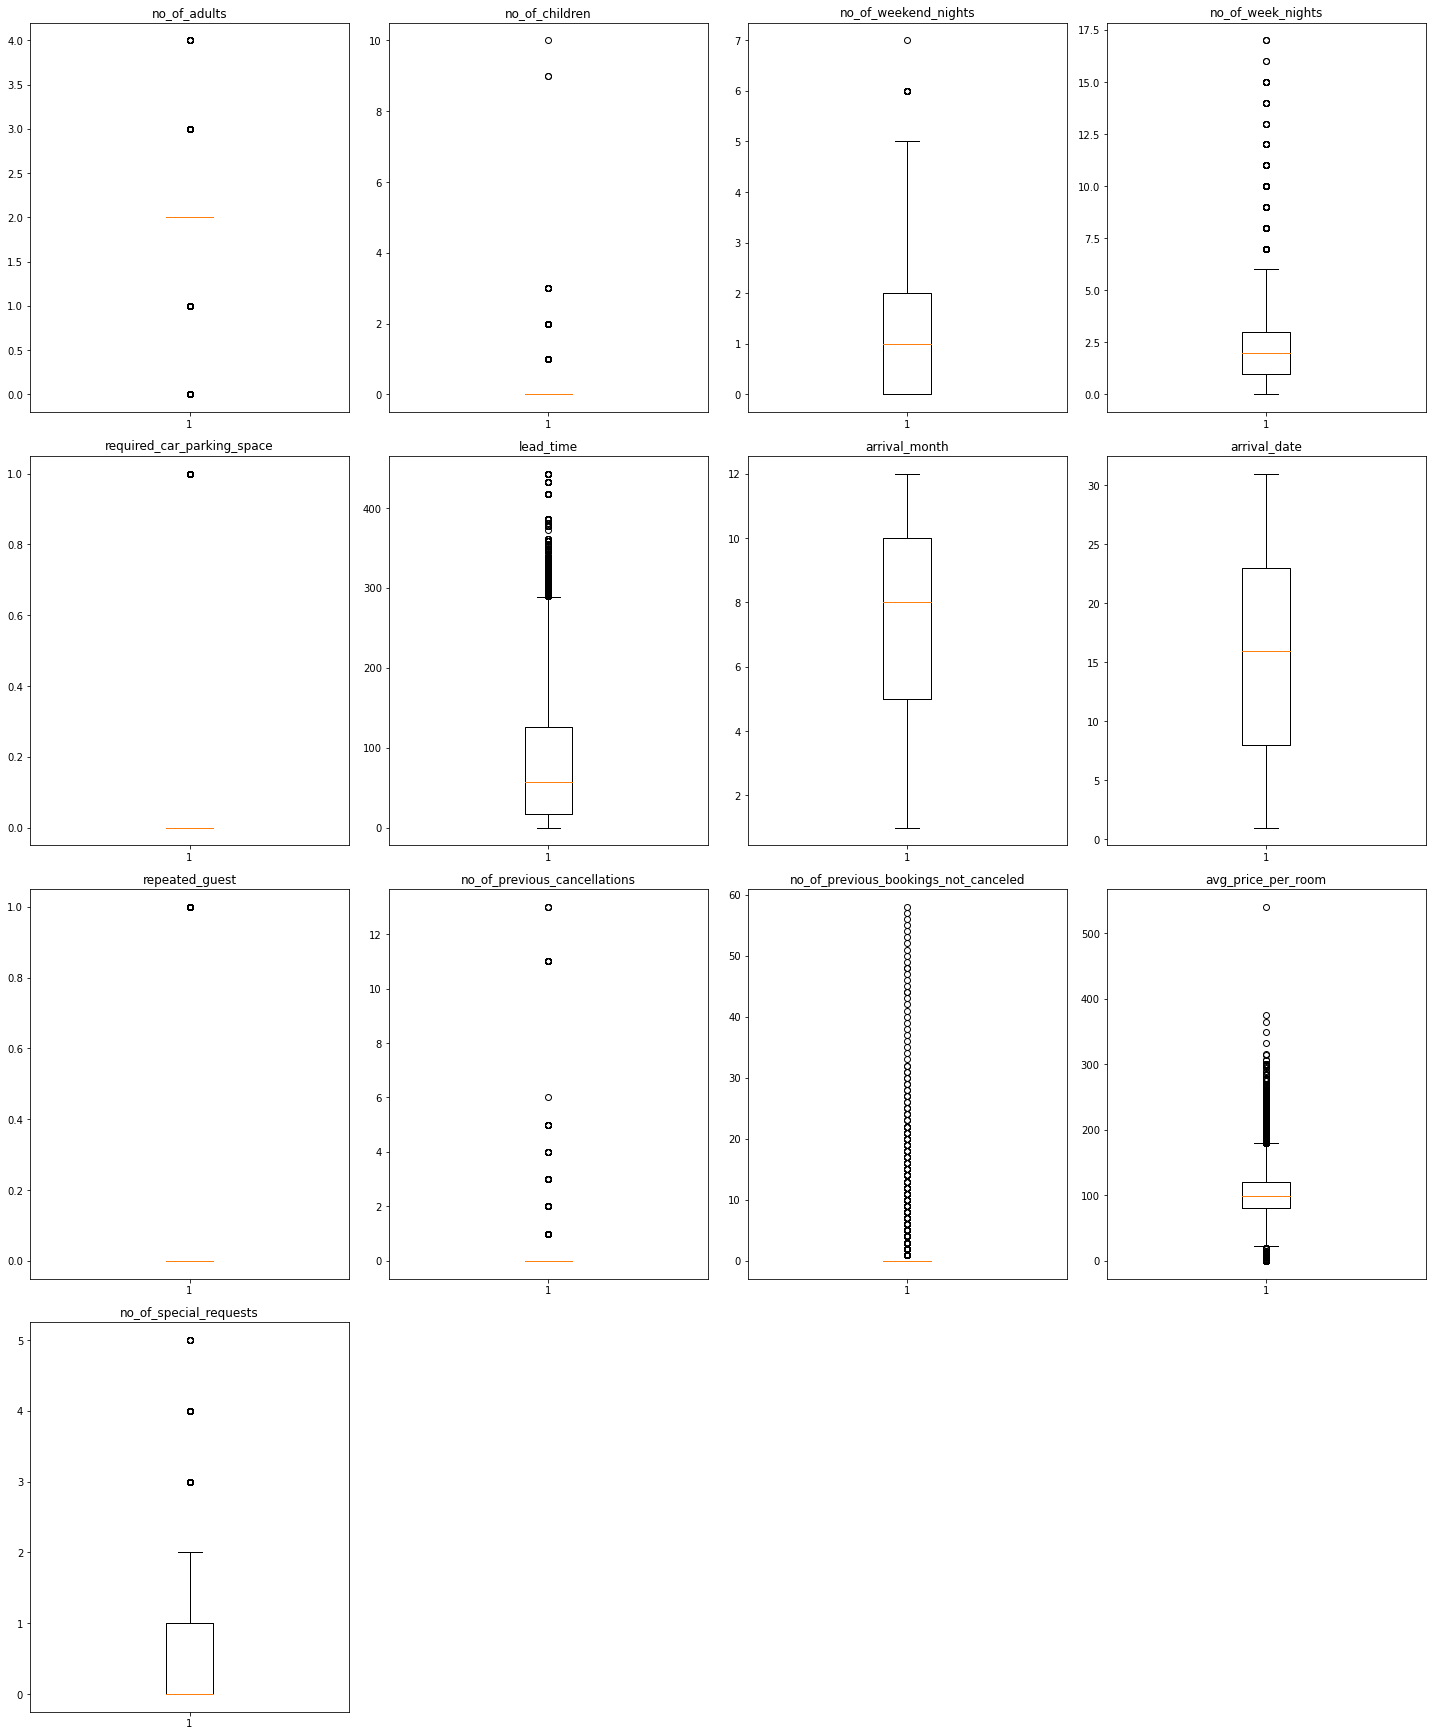

In [ ]:
numerical_col = df_copy.select_dtypes(include = np.number).columns.tolist()
plt.figure(figsize = (20,30))

for i,variable in enumerate(numerical_col):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df_copy[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

We dont need to treat outliers as we have proper values.

### Data Preparation for Modeling

**Encoding Not Cancelled as 0 and Cancelled as 1 as we want to predict cancellations.**

In [ ]:
df_copy["booking_status"] = df_copy["booking_status"].apply(lambda x:1 if x=="Canceled" else 0)
df_copy.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,1


In [ ]:
# creating training and test sets
X = df_copy.drop(["booking_status"], axis=1)
Y = df_copy["booking_status"]

# adding constant to the independent variables
X = sm.add_constant(X)

#creating dummy variables
X = pd.get_dummies(X, drop_first = True)

# splitting data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state =1)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state =1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


## Model Building - Logistic Regression


In [ ]:
# fitting logistic regression model
logit = sm.Logit(Y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.3275
Time:                        17:08:05   Log-Likelihood:                -10822.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.4351      0.264     -9.217      0.000      -2.953      -1.917
no_of_adults                             0.1010      

**Observations**

- Negative values of the coefficient show that the probability of cancellation decreases with the increase in the corresponding attribute value
- Positive values of the coefficient show that the probability of cancellation increases with the increase in the corresponding attribute value
- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05, then any variable with a p-value less than 0.05 would be considered significant


### Model Performance Evaluation


**Model can make wrong predictions as**:

1. Predicting a booking will be canceled but in reality its not canceled.

2. Predicting a booking will not cancel but in reality it cancels.

**Which case is more important?**

* Second case is more important as this will impact the profitable policies and cancellations.


**How to reduce this loss?**

* We need to reduce both False Negatives

* Hence, we will be calculating Recall

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model using statsmodels
def model_performance_classification_statsmodels(model, predictors, target, threshold = 0.5):
    pred_temp = model.predict(predictors) > 0.5
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame({
        "Accuracy":acc,
        "Recall":recall,
        "Precsion":precision,
        "F1": f1,
    }, index=[0])

    return df_perf

In [ ]:
# defining a function to plot confusion matrix
def confusion_matrix_statsmodels(model, predictors, target, threshold = 0.5):
    y_pred = model.predict(predictors) > 0.5
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item/cm.flatten().sum())] for item in cm.flatten()]).reshape(2,2)


    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

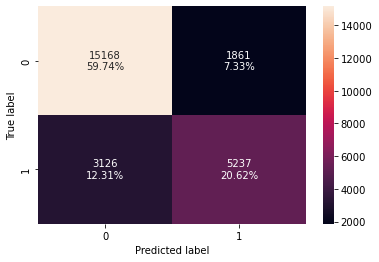

In [ ]:
confusion_matrix_statsmodels(lg, X_train, Y_train)

In [ ]:
print("Training performance")
model_performance_classification_statsmodels(lg, X_train, Y_train)

Training performance


,Accuracy,Recall,Precsion,F1
0,0.8036,0.626211,0.737813,0.677446


### observations:
- Recall is ~0.62 and we will try to maximize it further
- Variables used to build the model might contain multicollinearity, which will affect the p-values.
- We will remove multicollinearity to get reliable coefficients and p-values

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
vif_series = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
                      index = X_train.columns,
                      dtype = float,)
print("Series before feature selection\n", vif_series)

Series before feature selection
 const                                   329.505354
no_of_adults                              1.346585
no_of_children                            1.977636
no_of_weekend_nights                      1.068131
no_of_week_nights                         1.095607
required_car_parking_space                1.039747
lead_time                                 1.246298
arrival_month                             1.053658
arrival_date                              1.006728
repeated_guest                            1.781384
no_of_previous_cancellations              1.394562
no_of_previous_bookings_not_canceled      1.647301
avg_price_per_room                        1.936214
no_of_special_requests                    1.245328
type_of_meal_plan_Meal Plan 2             1.203489
type_of_meal_plan_Meal Plan 3             1.025214
type_of_meal_plan_Not Selected            1.236691
room_type_reserved_Room_Type 2            1.100684
room_type_reserved_Room_Type 3            1.00323

We can ignore the vif for categorical variables, as the vif for other variables is less than 5 we have checked for multicollinearity.

### Removing high p-value variables

In [ ]:
cols = X_train.columns.tolist()
max_p_value = 1

while(len(cols)>0):
    X_train_aux = X_train[cols]
    model = sm.Logit(Y_train, X_train_aux).fit()
    p_values = model.pvalues
    max_p_value = max(p_values)

    feature_with_p_max = p_values.idxmax()

    if max_p_value>0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

         Current function value: 0.426208
         Iterations: 35
         Current function value: 0.426243
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.426785
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.426785
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.426786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.426786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.426793
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.426844
         Iterations 9
['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'typ

In [ ]:
X_train2 = X_train[selected_features]

In [ ]:
logit2 = sm.Logit(Y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.3264
Time:                        17:08:10   Log-Likelihood:                -10838.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.9597      0.107    -27.589      0.000      -3.170      -2.749
no_of_adults                       0.0955      0.037      2.565      0.

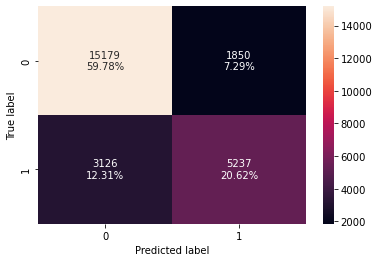

In [ ]:
confusion_matrix_statsmodels(lg2, X_train2, Y_train)

In [ ]:
print("Training performance")
model_performance_classification_statsmodels(lg2, X_train2, Y_train)

Training performance


,Accuracy,Recall,Precsion,F1
0,0.804033,0.626211,0.738959,0.677929


In [ ]:
X_test2 = X_test[selected_features]

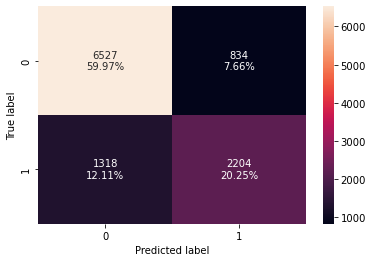

In [ ]:
confusion_matrix_statsmodels(lg3, X_test2, Y_test)

In [ ]:
print("Test performance")
model_performance_classification_statsmodels(lg3, X_test2, Y_test)

Test performance


,Accuracy,Recall,Precsion,F1
0,0.80226,0.625781,0.725477,0.671951


### Coefficient Interpretations

In [ ]:
# converting coefficients to odds
odds = np.exp(lg2.params)
perc_change_odds = (np.exp(lg2.params)-1) * 100
pd.set_option("display.max_columns", None)
pd.DataFrame({"Odds":odds, "Change_odd%":perc_change_odds}, index = X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.051833,1.100186,1.171286,1.116603,1.043191,0.197652,1.016412,0.939774,0.066984,1.254807,1.020782,0.233125,1.417735,0.689492,0.769581,0.495115,0.351460,0.222763,0.444008,0.162953
Change_odd%,-94.816709,10.018618,17.128569,11.660334,4.319063,-80.234750,1.641159,-6.022621,-93.301633,25.480650,2.078193,-76.687458,41.773497,-31.050776,-23.041857,-50.488479,-64.854036,-77.723691,-55.599205,-83.704741


- `lead_time`:Holding all other features constant, a 1 unit change in the lead time would increase the odds of cancellation by 1.6%
- `avg_price_per_room`:Holding all other features constant, a 1 unit change in the lead time would increase the odds of cancellation by 2%
- `arrival _month`:Holding all other features constant, a 1 unit change in the arrival month would decrease the odds of cancellation by 6%, bookings for the specific months create a huge difference in cancellations
- `no_of_special_requests`:Holding all other features constant, a 1 unit change in the number of special requests would decrease the odds of cancellation by 76%, bookings with special requests have a very less chance of cancelling.

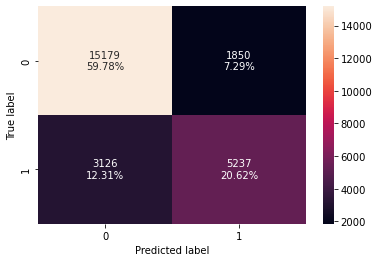

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, Y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, Y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precsion,F1
0,0.804033,0.626211,0.738959,0.677929


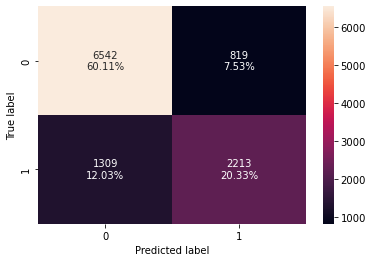

In [ ]:
confusion_matrix_statsmodels(lg2, X_test2, Y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, Y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precsion,F1
0,0.804466,0.628336,0.729881,0.675313


## Model performance evaluation

### ROC Curve and ROC-AUC

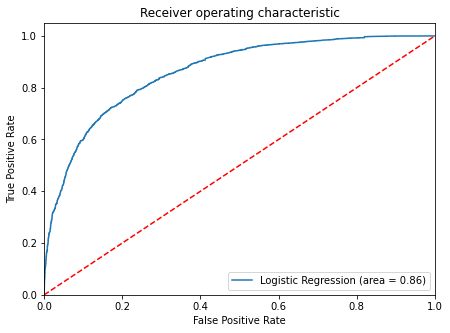

In [ ]:
logit_roc_auc_train = roc_auc_score(Y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(Y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(Y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.308937745034109


**Checking model performance on training set**

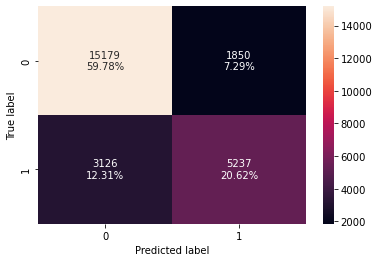

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, Y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, Y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precsion,F1
0,0.804033,0.626211,0.738959,0.677929


**Checking model performance on test set**

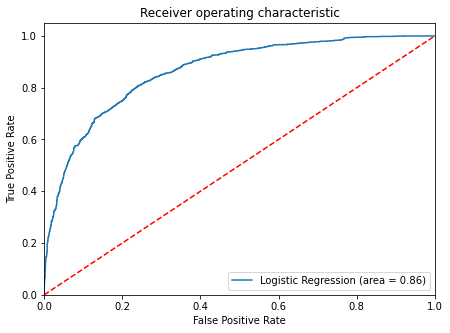

In [ ]:
logit_roc_auc_train = roc_auc_score(Y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(Y_test, lg3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

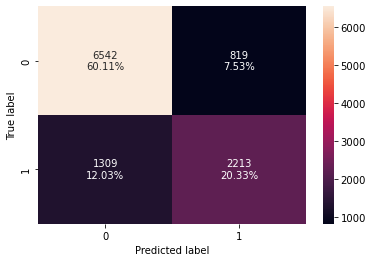

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, Y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, Y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precsion,F1
0,0.804466,0.628336,0.729881,0.675313


### Precision-Recall Curve

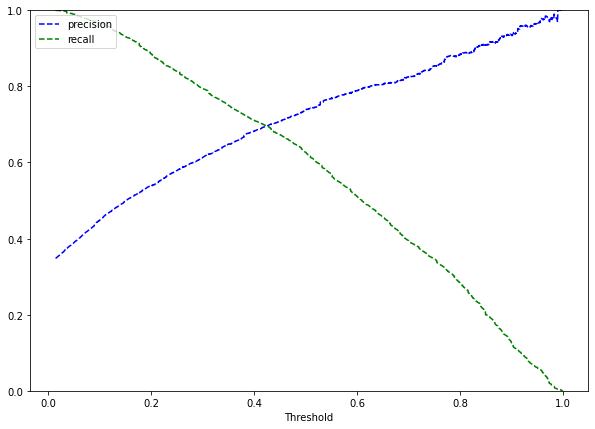

In [ ]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(Y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

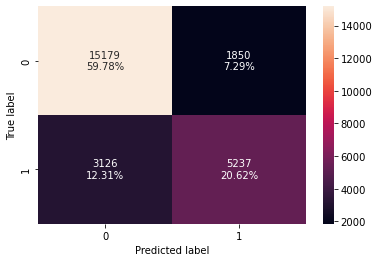

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, Y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, Y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precsion,F1
0,0.804033,0.626211,0.738959,0.677929


**Checking model performance on test set**

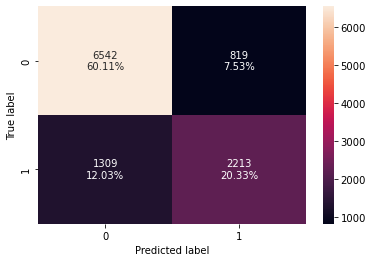

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, Y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, Y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precsion,F1
0,0.804466,0.628336,0.729881,0.675313


In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.3 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.3 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.804033,0.804033,0.804033
Recall,0.626211,0.626211,0.626211
Precsion,0.738959,0.738959,0.738959
F1,0.677929,0.677929,0.677929


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.3 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.3 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.804466,0.804466,0.804466
Recall,0.628336,0.628336,0.628336
Precsion,0.729881,0.729881,0.729881
F1,0.675313,0.675313,0.675313


## Building a Decision Tree model

In [ ]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
replaceStruct = {"type_of_meal_plan": {"Meal Plan 1":1,"Not Selected":2, "Meal Plan 2":3,"Meal Plan 3":4},
                 "room_type_reserved":{"Room_Type 1":1,"Room_Type 2":2,'Room_Type 3':3,
                                       'Room_Type 4':4,'Room_Type 5':5,'Room_Type 6':6, 'Room_Type 7':7 },
                 "market_segment_type":{'Offline':1, 'Online':2, 'Corporate':3, 'Aviation':4, 'Complementary':5},
                 "booking_status":{'Not_Canceled':0, 'Canceled':1}}

In [ ]:
df = df.replace(replaceStruct)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,2,0,1,5,2018,11,6,2,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,2,0,1,48,2018,4,11,2,0,0,0,94.50,0,1


In [ ]:
df.drop('Booking_ID',axis=1,inplace = True)

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,0
1,2,0,2,3,2,0,1,5,2018,11,6,2,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,1
4,2,0,1,1,2,0,1,48,2018,4,11,2,0,0,0,94.50,0,1


## Model Performance Comparison and Conclusions

In [ ]:
# Split data
X = df.drop('booking_status', axis = 1)
Y = df.pop('booking_status')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dTree.fit(X_train, Y_train )

DecisionTreeClassifier(random_state=1)

In [ ]:
print("Accuracy on training set:",dTree.score(X_train, Y_train))
print("Accuracy on test set:",dTree.score(X_test, Y_test))

Accuracy on training set: 0.994210775047259
Accuracy on test set: 0.869061839566296


In [ ]:
## Function to create confusion matrix
from sklearn import metrics
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))

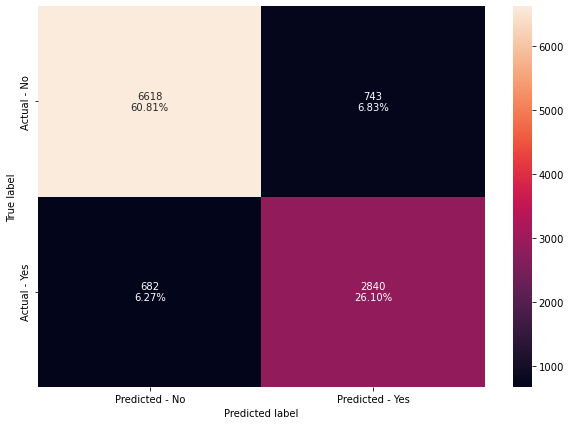

In [ ]:
make_confusion_matrix(dTree,Y_test)

In [ ]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9866076766710511
Recall on test set :  0.8063600227143668


## Visualizing the Decision Tree

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


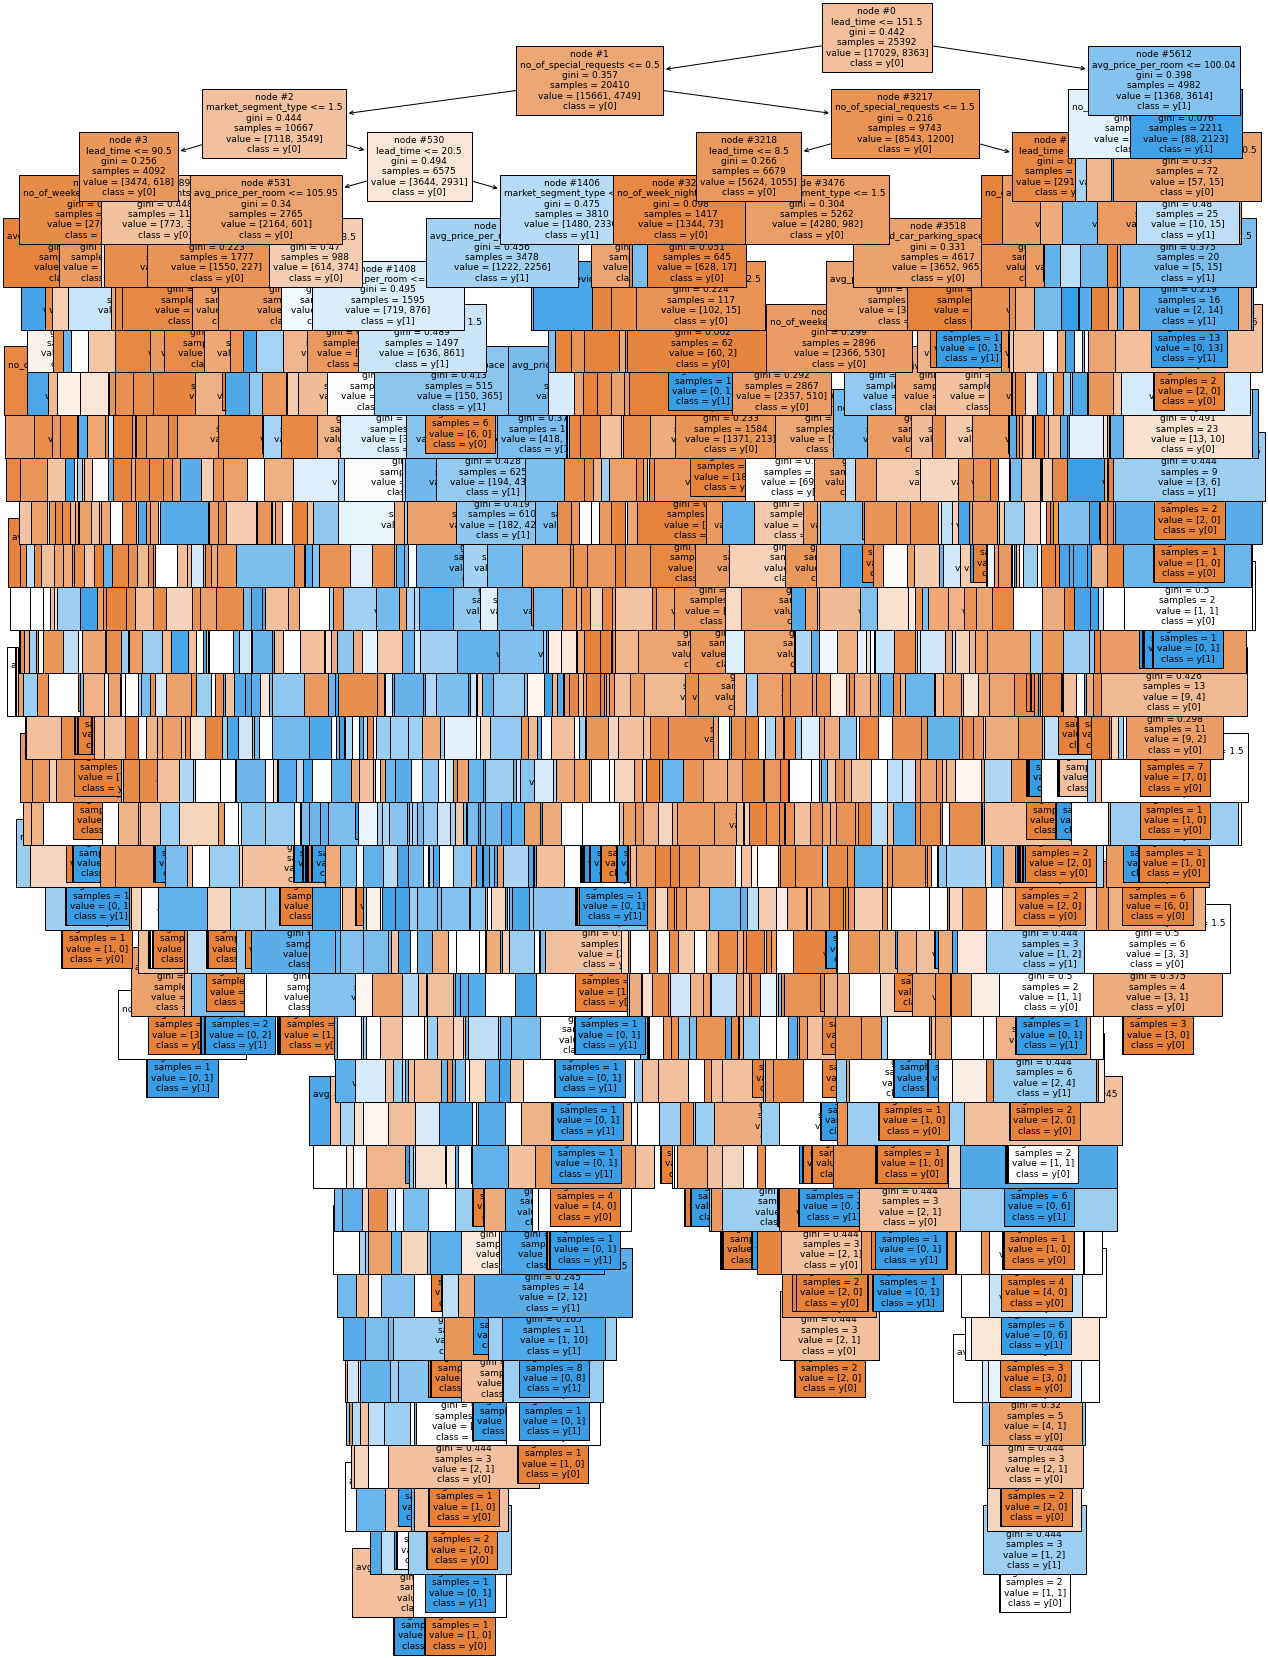

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 197.00
|   |   |   |   |   |   |--- weights: [1609.00, 0.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  197.00
|   |   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |   |--- weights: [0.00, 16.00] class: 1
|   |   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |--- arrival_date <= 27.50
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [27.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights >  1.50
|  

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.368980
avg_price_per_room                    0.180678
arrival_date                          0.083580
market_segment_type                   0.072612
no_of_special_requests                0.067771
arrival_month                         0.063538
no_of_week_nights                     0.046775
no_of_weekend_nights                  0.035461
no_of_adults                          0.032175
arrival_year                          0.014328
type_of_meal_plan                     0.012666
room_type_reserved                    0.008628
required_car_parking_space            0.006481
no_of_children                        0.004796
no_of_previous_bookings_not_canceled  0.000995
repeated_guest                        0.000303
no_of_previous_cancellations          0.000234


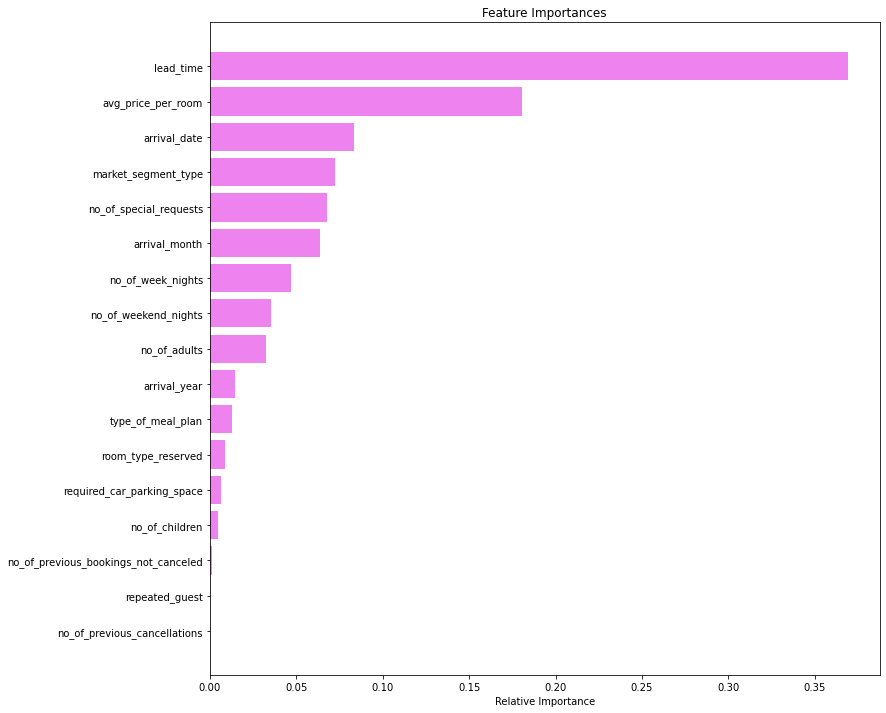

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- According to decision tree model, lead tie & avg price per room are important variables for predicting cancelations.

## Reducing over fitting


In [ ]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Confusion Matrix - decision tree with depth restricted to 3

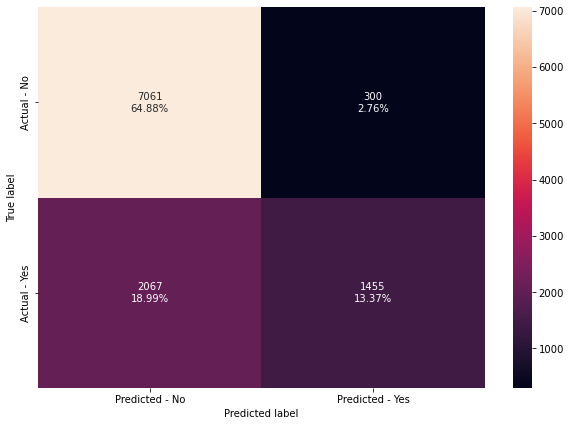

In [ ]:
make_confusion_matrix(dTree1, Y_test)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, Y_train))
print("Accuracy on test set : ",dTree1.score(X_test, Y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.7740233144297417
Accuracy on test set :  0.7825048240374897
Recall on training set :  0.4005739567140978
Recall on test set :  0.4131175468483816


- Recall on training set has reduced from 0.98 to 0.40 but this is an improvement because now the model is not overfitting and we have a generalized model.

## Visualizing the Decision Tree


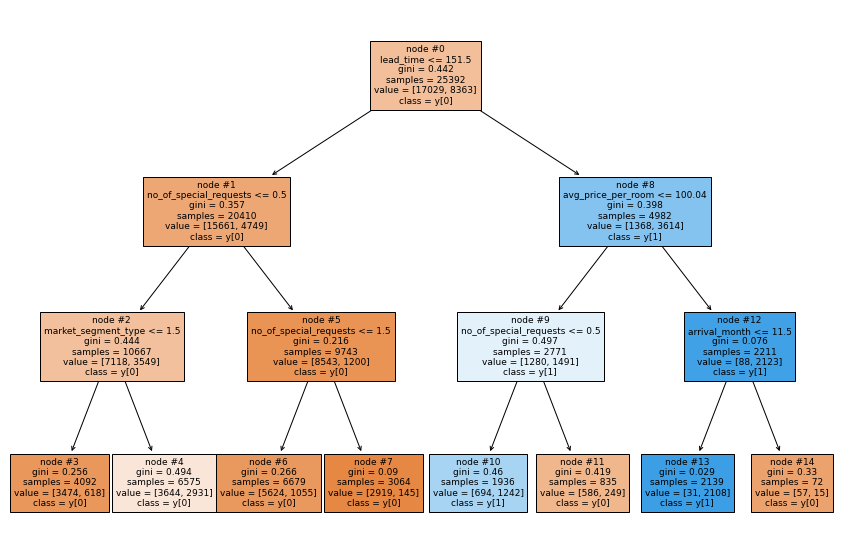

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- weights: [3474.00, 618.00] class: 0
|   |   |--- market_segment_type >  1.50
|   |   |   |--- weights: [3644.00, 2931.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [5624.00, 1055.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [2919.00, 145.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [694.00, 1242.00] class: 1
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [586.00, 249.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [31.00, 2108.00] class: 1
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [57.00, 15.00] class: 0



* The tree has become readable now but the recall on test set has not improved.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.549090
no_of_special_requests                0.179630
avg_price_per_room                    0.123760
market_segment_type                   0.123760
arrival_month                         0.023761
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_date                          0.000000
no_of_adults                          0.000000
no_of_children                        0.000000
room_type_reserved                    0.000000
required_car_parking_space            0.000000
type_of_meal_plan                     0.000000
no_of_week_nights                     0.000000
no_of_weekend_nights                  0.000000
arrival_year                          0.000000


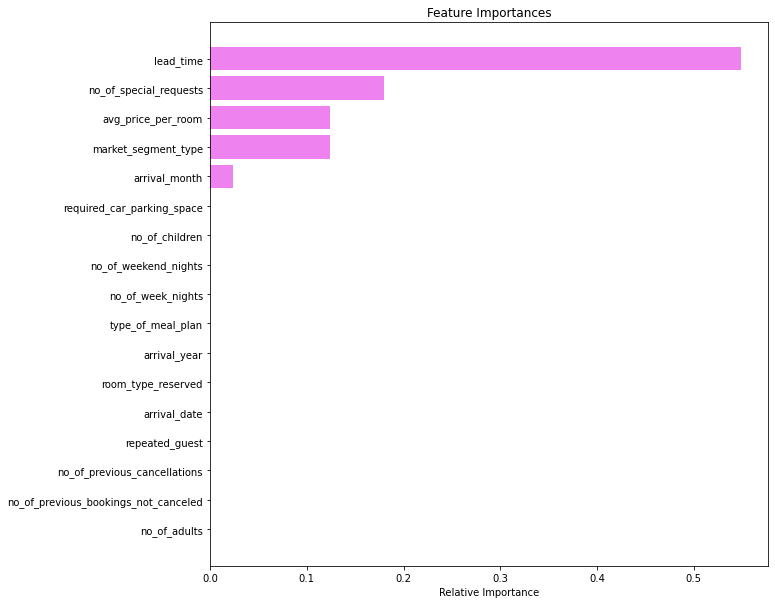

In [ ]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Compared to previous model, no of special requests is more important than avg price per room.
- this is the shortcoming of prepruning, we limited the tree even before knowing the importance of split and features
- We will use pre pruning using grid search, may be setting max_depth to 3 is not good enough

### Using GridSearch for Hyperparameter tuning of our tree model


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.01, random_state=1)

## Confusion Matrix - decision tree with tuned hyperparameters


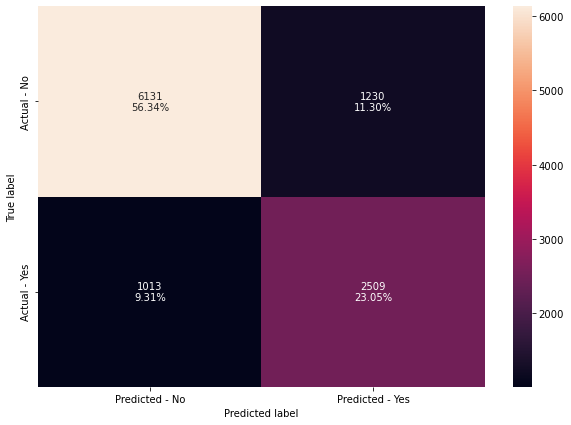

In [ ]:
make_confusion_matrix(estimator,Y_test)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, Y_train))
print("Accuracy on test set : ",estimator.score(X_test, Y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.792572463768116
Accuracy on test set :  0.7938987411559313
Recall on training set :  0.7107497309577903
Recall on test set :  0.7123793299261784


- Recall on the hypertuned tree has improved a lot from 0.46 to 0.71

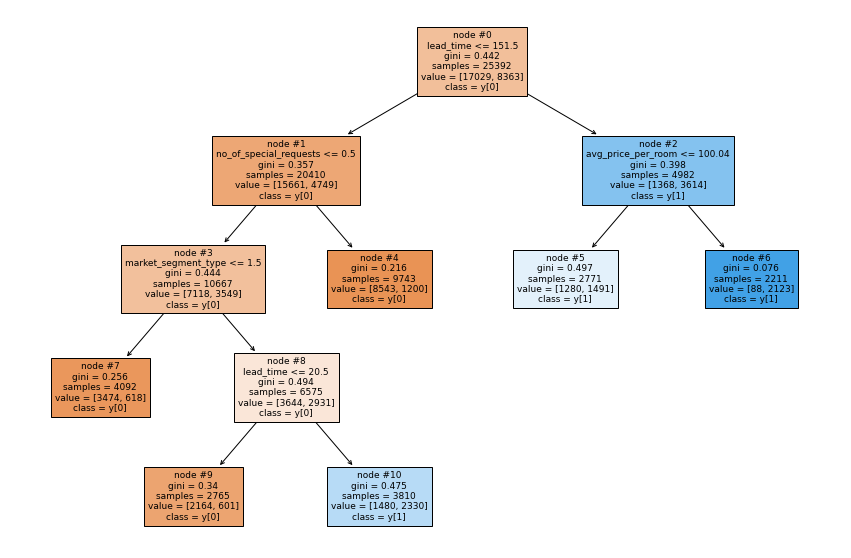

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- weights: [3474.00, 618.00] class: 0
|   |   |--- market_segment_type >  1.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- weights: [2164.00, 601.00] class: 0
|   |   |   |--- lead_time >  20.50
|   |   |   |   |--- weights: [1480.00, 2330.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8543.00, 1200.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1280.00, 1491.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [88.00, 2123.00] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                           Imp
lead_time                             0.648522
no_of_special_requests                0.118735
avg_price_per_room                    0.116371
market_segment_type                   0.116371
arrival_month                         0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_date                          0.000000
no_of_adults                          0.000000
no_of_children                        0.000000
room_type_reserved                    0.000000
required_car_parking_space            0.000000
type_of_meal_plan                     0.000000
no_of_week_nights                     0.000000
no_of_weekend_nights                  0.000000
arrival_year                          0.000000


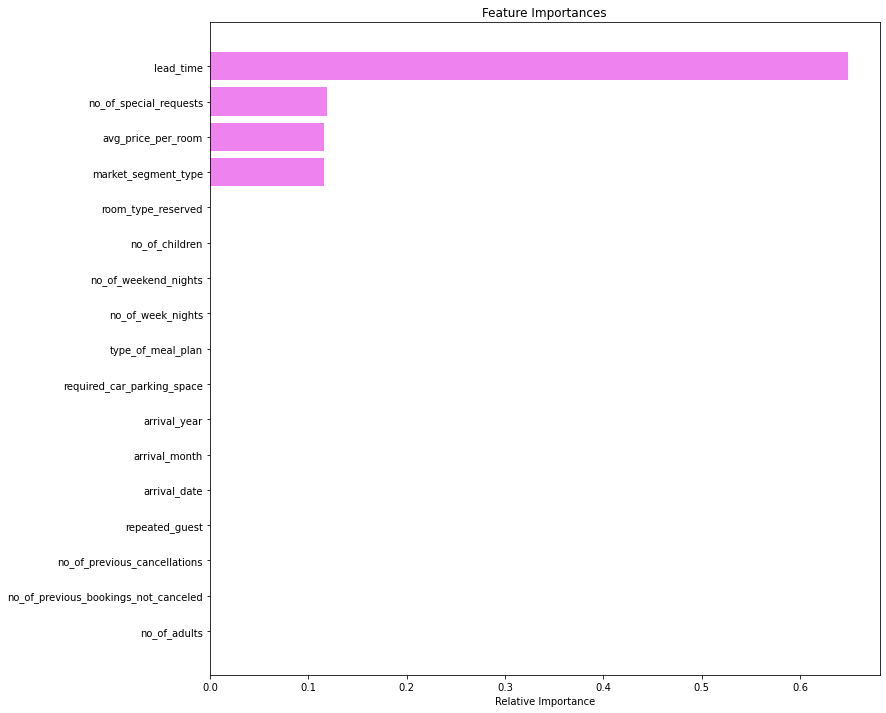

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- After grid search pruning, arrival month is deemed as not important

## Cost Complexity Pruning


In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007572
1,1.219272e-07,0.007572
2,1.842455e-07,0.007573
3,2.895771e-07,0.007573
4,4.688391e-07,0.007573
...,...,...
1358,4.542523e-03,0.280273
1359,6.585026e-03,0.293443
1360,1.725993e-02,0.310703
1361,1.815996e-02,0.365183


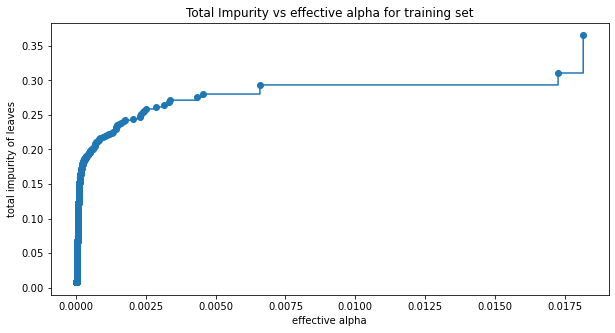

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371357


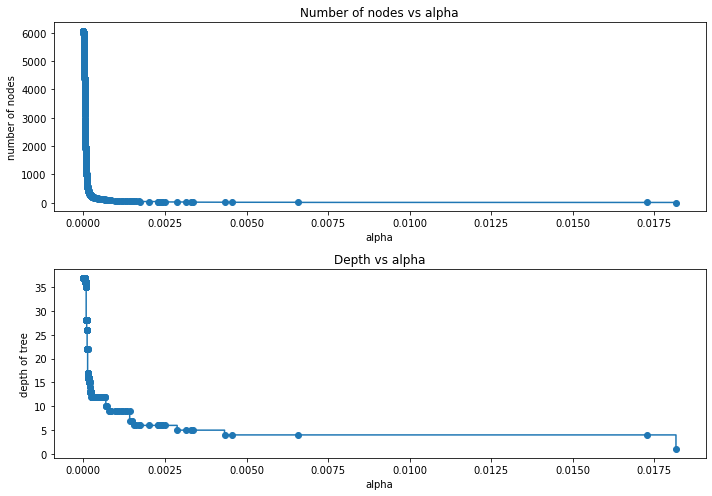

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


#### Accuracy vs alpha for training and testing sets

In [ ]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

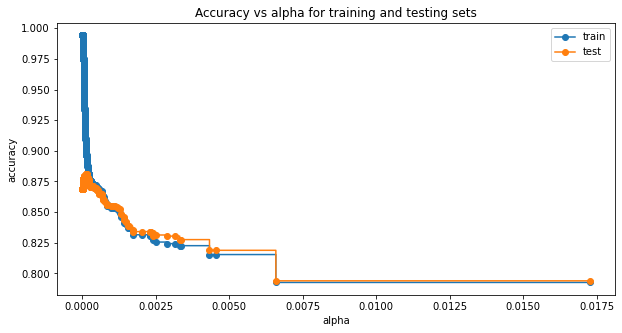

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, Y_train))
print('Test accuracy of best model: ',best_model.score(X_test, Y_test))

DecisionTreeClassifier(ccp_alpha=0.00012154074239986487, random_state=1)
Training accuracy of best model:  0.9013074984247007
Test accuracy of best model:  0.8807314159698613


#### Since accuracy isn't the right metric for our data we would want high recall


In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(Y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(Y_test,pred_test3)
    recall_test.append(values_test)

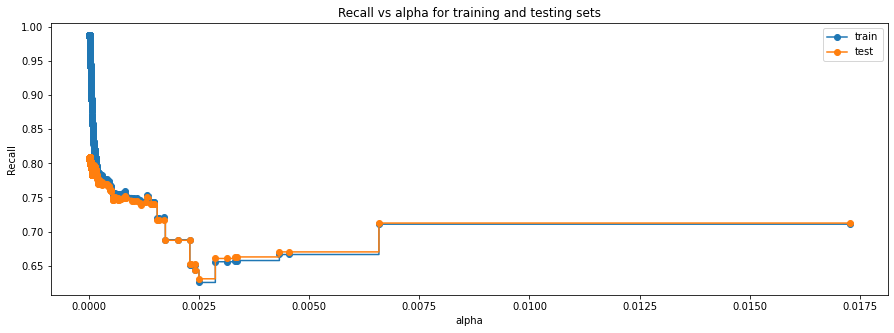

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.4873146950552198e-05, random_state=1)


## Confusion Matrix - post-pruned decision tree

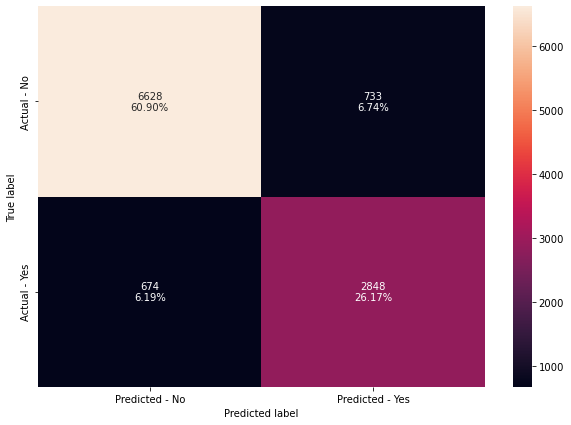

In [ ]:
make_confusion_matrix(best_model,Y_test)

In [ ]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9855315078321176
Recall on test set :  0.8086314593980692


* With post-pruning we get the highest recall on both training and test set

## Visualizing the Decision Tree

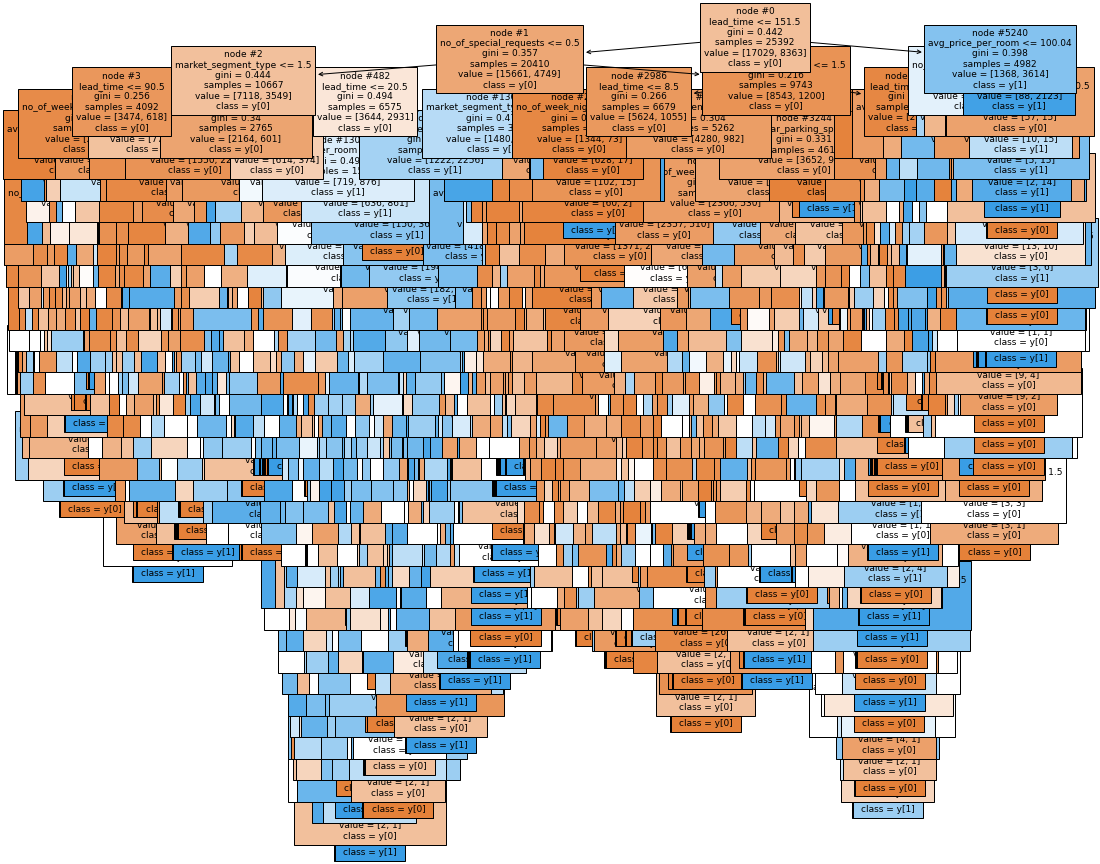

In [ ]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 197.00
|   |   |   |   |   |   |--- weights: [1609.00, 0.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  197.00
|   |   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |   |--- weights: [0.00, 16.00] class: 1
|   |   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |--- arrival_date <= 27.50
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [27.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights >  1.50
|  

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.370056
avg_price_per_room                    0.180422
arrival_date                          0.082664
market_segment_type                   0.073167
no_of_special_requests                0.068300
arrival_month                         0.063418
no_of_week_nights                     0.046121
no_of_weekend_nights                  0.035390
no_of_adults                          0.032122
arrival_year                          0.014341
type_of_meal_plan                     0.012725
room_type_reserved                    0.008451
required_car_parking_space            0.006532
no_of_children                        0.004778
no_of_previous_bookings_not_canceled  0.001003
repeated_guest                        0.000275
no_of_previous_cancellations          0.000236


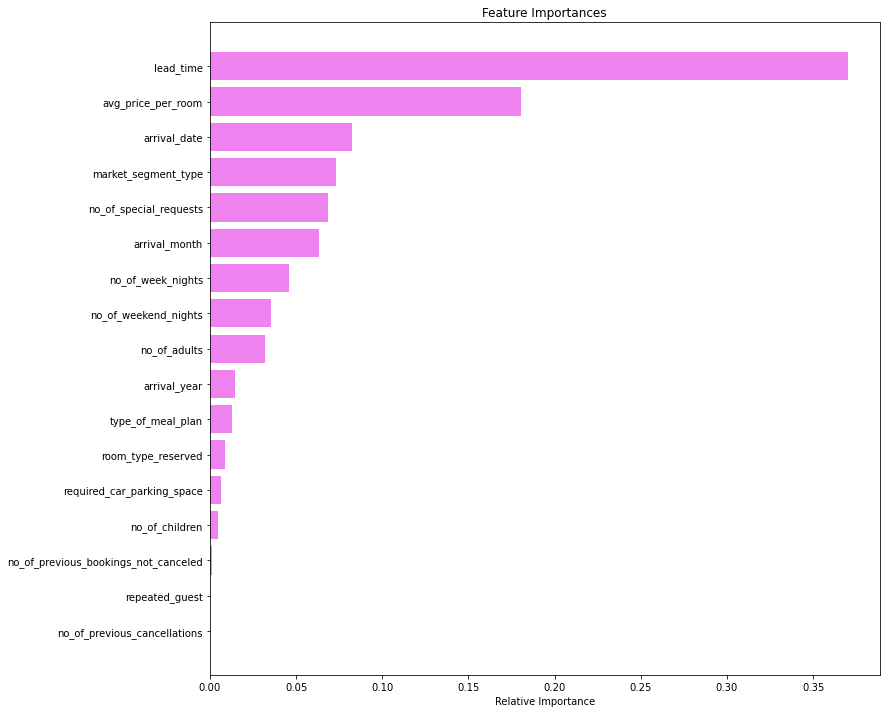

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- This matches again with the first decision tree which was created without any pruning/hyper paramters.
- lead_time and avg price per room are the most important features

## Comparing all the decision tree models

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[0.98,0.40,0.71,0.98], 'Test_Recall':[0.80,0.41,0.71,0.80]})
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,0.98,0.80
1,Decision tree with restricted maximum depth,0.40,0.41
2,Decision treee with hyperparameter tuning,0.71,0.71
3,Decision tree with post-pruning,0.98,0.80


**Decision tree with post-pruning is giving the highest recall on test set.**

## Actionable Insights and Recommendations

- We have built a predictive model with 80% recall accuracy using Logistic Regression & Decision Trees i.e we can be 80% sure of predicting which customers will cancel.
- Lead time, avg price per room and arrival date are the most important components related to cancelation
- As per the data, customers with a longer lead time tend to cancel more compared to shorter lead time customers which holds true that people reserve the hotels in advance and last minute plans can change. Hotel should create stricter cancelation policy for the bookings with a lead time of more than 120 days.
- Bookings with special requests have a 76% lesser probability of canceling, hotel can trust these bookings wont cancel
- Hotels should monitor their online avg price per room, customers cancel their current booking if the price is higher or a conditional refund policy can be applied depending on how close the arrival date is.
- Online segments have the most bookings and cancelations, hence having stricter policies based on the combination of lead time, price and segment can help the hotel to avoid unwanted losses in the end.